## Install deps

In [63]:
# %pip install pandas
# %pip install scikit-learn
# %pip install seaborn
%pip install category_encoders
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aduny\Projects\ml\machine_learning\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: catboost in c:\users\aduny\projects\ml\machine_learning\lib\site-packages (1.2)



You should consider upgrading via the 'c:\Users\aduny\Projects\ml\machine_learning\Scripts\python.exe -m pip install --upgrade pip' command.


## Imports

In [64]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import numpy as np

## Load dataset

In [65]:
dataframe = read_csv("clear_all_data.csv", index_col=0)
dataframe.head()


,city,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,district
0,Москва,1,5,1,12.00,291666,3500000,2012,19.0,9.1,Москва
1,Москва,17,41,1,40.40,618811,25000000,2021,15.2,9.1,Москва
2,Москва,5,14,1,61.97,919799,57000000,2022,19.0,9.1,Москва
3,Москва,9,41,1,40.50,617283,25000000,2022,17.3,9.3,Москва
4,Москва,12,17,1,47.60,324579,15450000,2019,19.0,10.0,Москва


## Define args and y

In [66]:
X = dataframe.drop("price_per_m2", axis=1)
y = dataframe.price_per_m2


## Split to train and test dataframes

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [68]:
from category_encoders import CatBoostEncoder

cat_features = ['district', "city"]
encoder = CatBoostEncoder()
X_train_encoded = X_train.copy()
X_train_encoded[cat_features] = encoder.fit_transform(X_train[cat_features], y_train)

In [69]:
X_test_encoded = X_test.copy()
X_test_encoded[cat_features] = encoder.transform(X_test[cat_features])

## Define and train models

In [88]:
model_list = []

In [87]:
param_grid = {
    "depth": [1, 3, 5, 7],
}

### CatBoost

In [89]:
# catboost_regressor = CatBoostRegressor(task_type="GPU", devices="0:1", depth=8, iterations=2000, learning_rate=0.1)
catboost_regressor = CatBoostRegressor(task_type="GPU", devices="0:1", iterations=3000)

In [90]:
catboost_regressor.grid_search(param_grid, X_train_encoded, y_train)

0:	learn: 2375321.0780695	test: 3806961.7843487	best: 3806961.7843487 (0)	total: 26.2ms	remaining: 1m 18s
1:	learn: 2372068.4667567	test: 3804786.4227521	best: 3804786.4227521 (1)	total: 56.6ms	remaining: 1m 24s
2:	learn: 2369000.4265134	test: 3802733.6345513	best: 3802733.6345513 (2)	total: 79.8ms	remaining: 1m 19s
3:	learn: 2366115.1710718	test: 3800806.6397803	best: 3800806.6397803 (3)	total: 102ms	remaining: 1m 16s
4:	learn: 2363379.7895803	test: 3798980.6911668	best: 3798980.6911668 (4)	total: 125ms	remaining: 1m 14s
5:	learn: 2360802.7129396	test: 3797257.2575893	best: 3797257.2575893 (5)	total: 147ms	remaining: 1m 13s
6:	learn: 2358351.1127580	test: 3795762.4149208	best: 3795762.4149208 (6)	total: 175ms	remaining: 1m 14s
7:	learn: 2356042.0709260	test: 3794356.8355525	best: 3794356.8355525 (7)	total: 195ms	remaining: 1m 13s
8:	learn: 2353839.6207611	test: 3792871.4469124	best: 3792871.4469124 (8)	total: 219ms	remaining: 1m 12s
9:	learn: 2351769.4861269	test: 3791619.0759378	best

{'params': {'depth': 3},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
       

In [74]:
catboost_regressor.fit(X_train_encoded, y_train)

0:	learn: 2476803.2185342	total: 33.8ms	remaining: 30.1s
1:	learn: 2279935.5175386	total: 62.1ms	remaining: 27.6s
2:	learn: 2104555.3305178	total: 88ms	remaining: 26.1s
3:	learn: 1939823.3737744	total: 118ms	remaining: 26.1s
4:	learn: 1791215.6373539	total: 145ms	remaining: 25.8s
5:	learn: 1656087.9553497	total: 170ms	remaining: 25s
6:	learn: 1532436.7109518	total: 199ms	remaining: 25.2s
7:	learn: 1413726.8041669	total: 227ms	remaining: 25.1s
8:	learn: 1305387.4755501	total: 256ms	remaining: 25.2s
9:	learn: 1207272.7856974	total: 281ms	remaining: 24.8s
10:	learn: 1117476.2296359	total: 310ms	remaining: 24.8s
11:	learn: 1037893.6835211	total: 339ms	remaining: 24.8s
12:	learn: 1034953.4461585	total: 363ms	remaining: 24.5s
13:	learn: 959990.6291215	total: 391ms	remaining: 24.5s
14:	learn: 892699.1048703	total: 418ms	remaining: 24.5s
15:	learn: 832092.7062618	total: 448ms	remaining: 24.5s
16:	learn: 777083.3189163	total: 475ms	remaining: 24.5s
17:	learn: 727671.9447880	total: 499ms	remaini

23:	learn: 571388.6439394	total: 677ms	remaining: 24.5s
24:	learn: 546520.2069420	total: 706ms	remaining: 24.5s
25:	learn: 545754.1683033	total: 732ms	remaining: 24.4s
26:	learn: 524543.3556847	total: 761ms	remaining: 24.4s
27:	learn: 498284.5579773	total: 794ms	remaining: 24.5s
28:	learn: 472791.5526649	total: 825ms	remaining: 24.6s
29:	learn: 452507.6016661	total: 855ms	remaining: 24.6s
30:	learn: 451690.3762342	total: 1.01s	remaining: 28s
31:	learn: 431805.6159799	total: 1.05s	remaining: 28.3s
32:	learn: 416092.0915200	total: 1.1s	remaining: 28.6s
33:	learn: 415942.9269976	total: 1.13s	remaining: 28.6s
34:	learn: 402285.6270223	total: 1.16s	remaining: 28.4s
35:	learn: 391843.7521626	total: 1.19s	remaining: 28.3s
36:	learn: 378992.6376204	total: 1.22s	remaining: 28.1s
37:	learn: 378742.7221406	total: 1.24s	remaining: 27.9s
38:	learn: 365702.5826699	total: 1.27s	remaining: 27.8s
39:	learn: 355257.2405881	total: 1.29s	remaining: 27.6s
40:	learn: 351582.6408987	total: 1.32s	remaining: 2

In [75]:
model_list.append(catboost_regressor)

## Make prediction

In [76]:
predict_list = []

for model in model_list:
    predict_list.append(model.predict(X_test_encoded))

## Plot of data

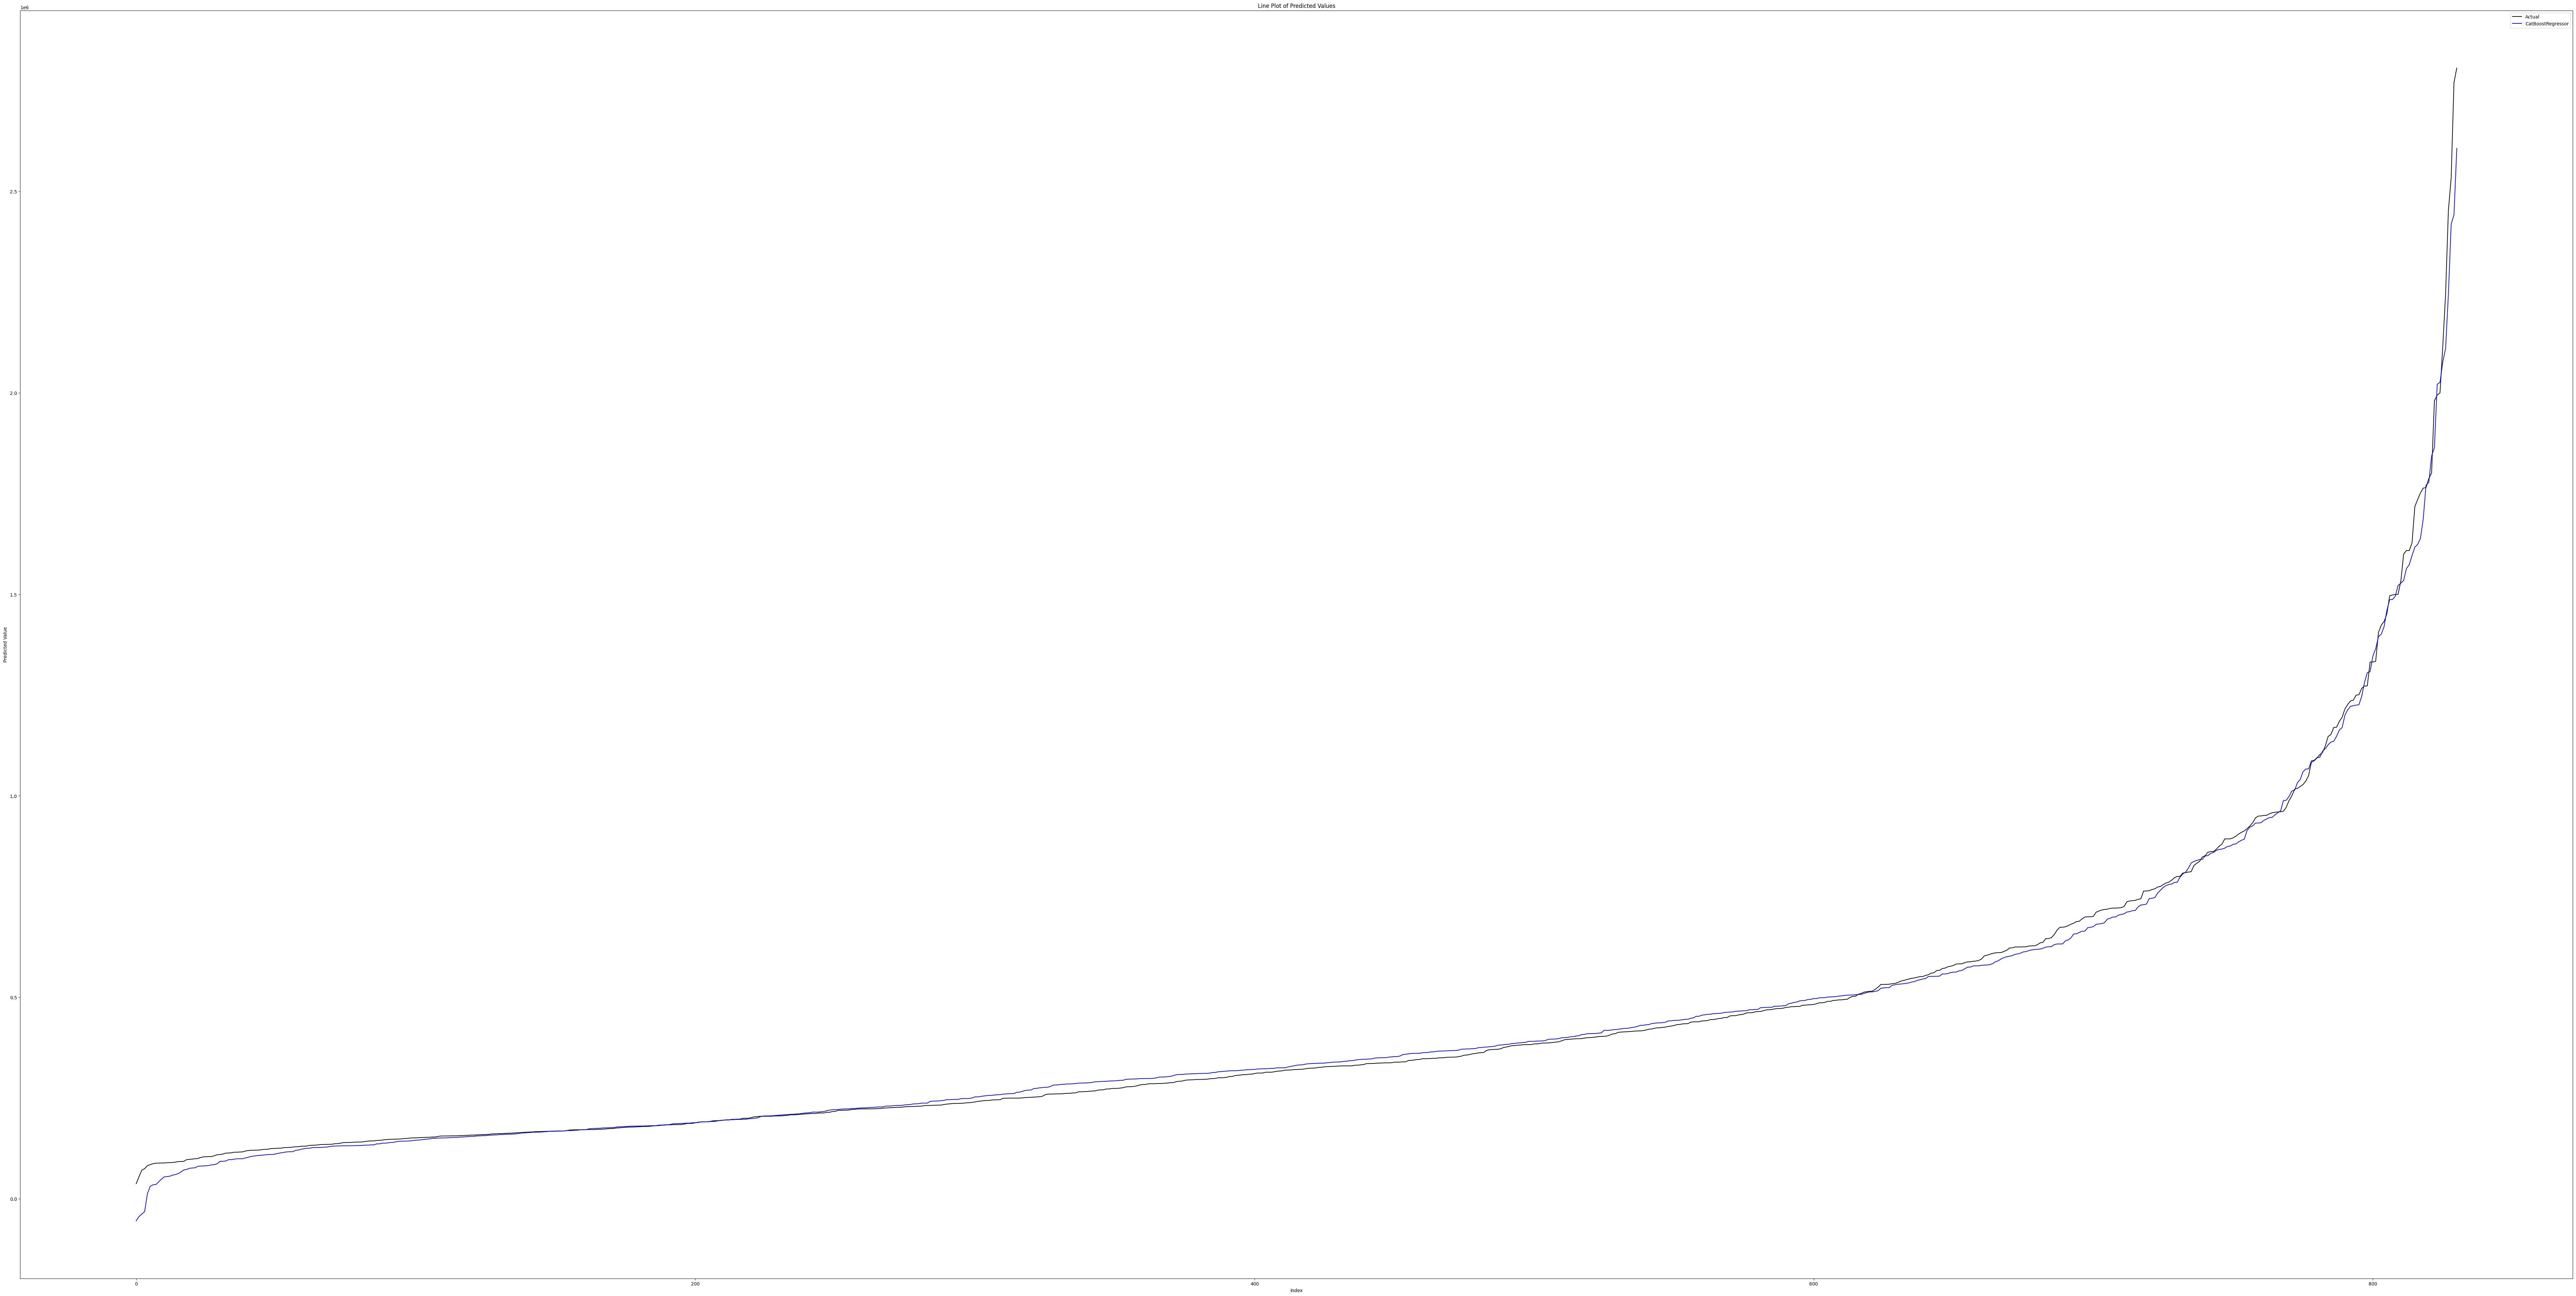

In [77]:
from matplotlib import pyplot as plt
from matplotlib import colors
import pandas as pd
import seaborn as sns
import numpy as np

ALL_COLORS = ["blue","orange","purple","green","white","gray"]

plt.figure(figsize=(100, 50))
sns.lineplot(x=range(len(y_test)), y=y_test.sort_values(), color='black', label='Actual')
plt.xlabel('Index')
plt.ylabel('Predicted Value')
plt.title('Line Plot of Predicted Values')

for i in range(0, len(model_list)):
    y = np.sort(predict_list[i])
    sns.lineplot(x=range(len(predict_list[i])), y=y, color=ALL_COLORS[i], label=type(model_list[i]).__name__)

plt.show()

## Check score of model

In [78]:
print("Scores: ")
for i, model in enumerate(model_list):
    print(f"\n* {type(model_list[i]).__name__}: {model.score(X_test_encoded, y_test)*100:.2f}%\t")

Scores: 

* CatBoostRegressor: 96.55%	


## Mean errors

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Absolute

In [80]:
print("MAE (Mean Absolute Error): ")
for i, predict in enumerate(predict_list):
    mse = mean_absolute_error(y_true=y_test, y_pred=predict)
    print(f"\n* {type(model_list[i]).__name__}: {mse:.2f}\t")

MAE (Mean Absolute Error): 

* CatBoostRegressor: 42590.82	


### Squared

In [81]:
print("MSE (Mean Squared Error): ")
for i, predict in enumerate(predict_list):
    print(f"\n* {type(model_list[i]).__name__}: {mean_squared_error(y_test, predict):.2f}\t")


MSE (Mean Squared Error): 

* CatBoostRegressor: 4843021765.26	
